<a href="https://colab.research.google.com/github/Guerouan/Handwriting-digits-recognition-Shap-explainability-/blob/master/hand_writing_digits_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import pandas as pd
import gzip
import numpy as np
conv = False

**importing and extracting data**

In [0]:
#! git clone https://github.com/Guerouan/Handwriting-digits-recognition-Shap-explainability-
  
#path ='Handwriting-digits-recognition-Shap-explainability-/'
#from tensorflow.contrib.learn.python.learn.datasets.mnist import extract_images, extract_labels

#with open(path + 'train-images-idx3-ubyte.gz', 'rb') as f:
#  train_images = extract_images(f)
#with open(path + 'train-labels-idx1-ubyte.gz', 'rb') as f:
#  train_labels = extract_labels(f)

#with open(path + 't10k-images-idx3-ubyte.gz', 'rb') as f:
#  test_images = extract_images(f)
#with open(path + 't10k-labels-idx1-ubyte.gz', 'rb') as f:
#  test_labels = extract_labels(f)

**Simple Solution for cloud puposes**

In [0]:
from tensorflow.keras.datasets import mnist
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

8


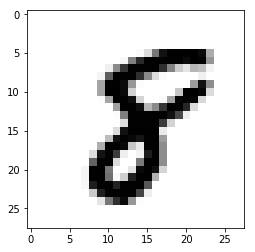

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

image_index = 777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

**Exploration Later**

**reshape images so it can be fitted into a neural network**

In [5]:
import tensorflow.keras as keras
from keras import backend as K
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Using TensorFlow backend.


**normalize Data**

In [6]:
x_train /=255
x_test /=255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
#one time execution

if conv==False:
  num_classes = 10
  # convert class vectors to binary class matrices
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)
  conv = True
  print('convertion done')

convertion done


**Model Creation**

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, AveragePooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(48, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_1 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 28)          4060      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 28)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28)                0         
__________

In [10]:
epochs = 10
batch_size = 10
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 41s 692us/step - loss: 0.2967 - acc: 0.9065 - val_loss: 0.0969 - val_acc: 0.9708
Epoch 2/10
60000/60000 [==============================] - 41s 689us/step - loss: 0.1127 - acc: 0.9657 - val_loss: 0.0727 - val_acc: 0.9773
Epoch 3/10
60000/60000 [==============================] - 41s 679us/step - loss: 0.0868 - acc: 0.9737 - val_loss: 0.0644 - val_acc: 0.9808
Epoch 4/10
60000/60000 [==============================] - 41s 680us/step - loss: 0.0735 - acc: 0.9773 - val_loss: 0.0526 - val_acc: 0.9832
Epoch 5/10
60000/60000 [==============================] - 42s 692us/step - loss: 0.0664 - acc: 0.9798 - val_loss: 0.0549 - val_acc: 0.9838
Epoch 6/10
60000/60000 [==============================] - 41s 682us/step - loss: 0.0587 - acc: 0.9820 - val_loss: 0.0579 - val_acc: 0.9827
Epoch 7/10
60000/60000 [==============================] - 41s 687us/

9


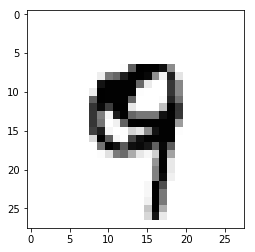

In [11]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [12]:
from collections import Counter
f_index = []
f_prediction = []
print(' predected value vs real value')
for i in range(len(x_test)):
    pred = model.predict(x_test[i].reshape(1, 28, 28, 1))
    if  pred.argmax() != list(y_test[i]).index(1):
        f_index.append(i)
        f_prediction.append(pred.argmax())
print(len(f_index))
Counter(f_prediction)

 predected value vs real value
146


Counter({0: 10, 1: 4, 2: 16, 3: 26, 4: 4, 5: 14, 6: 11, 7: 17, 8: 9, 9: 35})

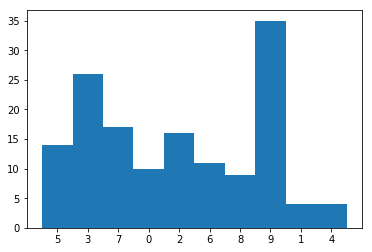

In [20]:
#make it more visualisable
labels, values = zip(*Counter(f_prediction).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes , labels)
plt.show()


In [21]:
indexes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

`print value where the model fail to recognise the number`

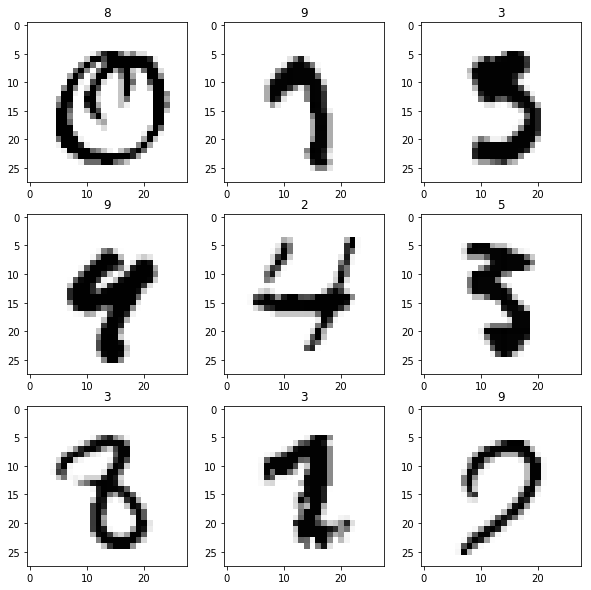

In [23]:
import random
number_samples = 9 #multple of three
samples =  random.sample(f_index, number_samples)
fig = plt.figure(figsize=(10, 10))
c = 1
for i in range(number_samples//3):
  for j in range(3):
    plt.subplot(3, 3, c)
    plt.imshow(x_test[samples[c-1]].reshape(28, 28),cmap='Greys')
    pred = model.predict(x_test[samples[c-1]].reshape(1, 28, 28, 1))
    plt.title(pred.argmax())
    c += 1
plt.show()
#plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
#pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
#print(pred.argmax())


**Explain model decision using shap**

In [24]:
! pip install shap
import shap

In [0]:
# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)


**succeed**

In [0]:
shap_values = e.shap_values(x_test[1:6])

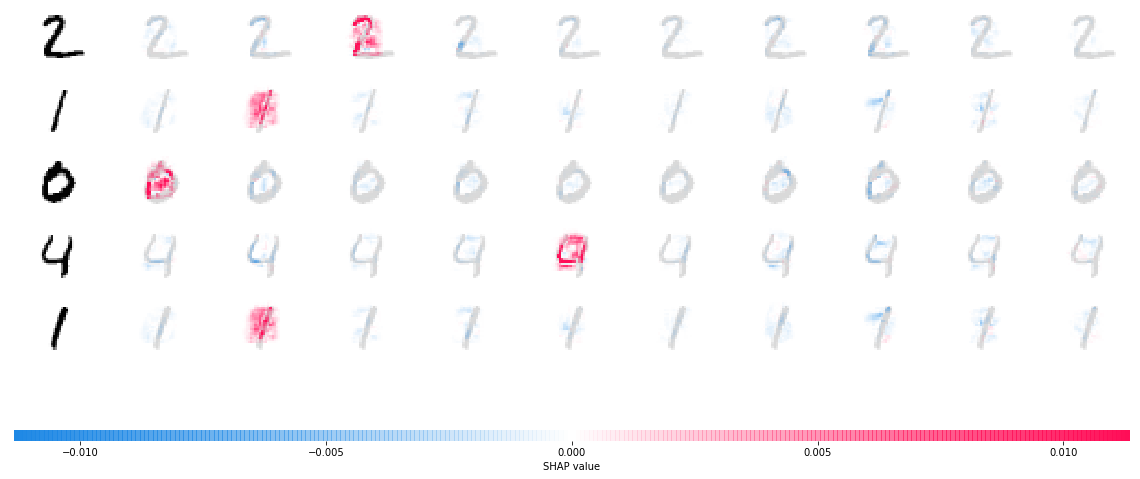

In [27]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:6])

**Failed**

In [0]:
samples = random.sample(f_index, 5)
shap_values = e.shap_values(x_test[samples])

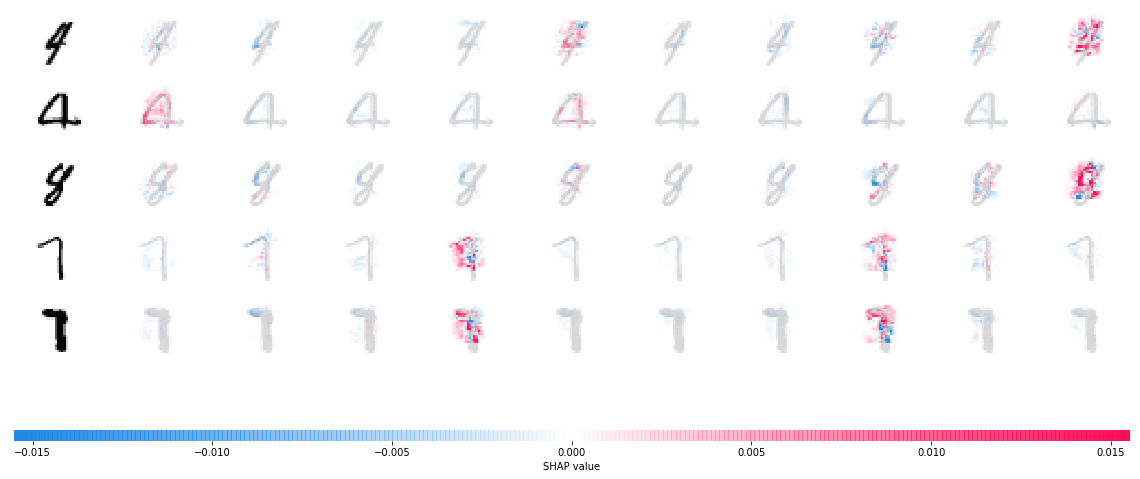

In [32]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[samples])